Karthikeyan Thirunavukkarasu
Elevvo
10/02/2026

## Introduction

This project performs Exploratory Data Analysis (EDA) on the Titanic dataset. 
The objective is to analyze patterns, handle missing data, and identify factors influencing survival.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset overview


In [30]:
df.shape

(891, 12)

In [31]:
df.info


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [32]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

## Missing Value Analysis
The dataset contains missing values in Age, Cabin, and Embarked columns.

In [33]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning
Age is filled using median.
Embarked is filled using mode.
Cabin column is dropped due to high missing values.

In [34]:
df['Age'].fillna(df['Age'].median(),
                    inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11472\1140238893.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Age'].fillna(df['Age'].median(),


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [35]:
df['Embarked'].fillna(df['Embarked'].mode()[0],
                    inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11472\1475078348.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Embarked'].fillna(df['Embarked'].mode()[0],


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: str

In [36]:
df.drop('Cabin', axis=1, inplace=True)

In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [38]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [39]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [40]:
print(df['Age'].isnull().sum())
print(df['Embarked'].isnull().sum())

0
0


In [41]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
df['Survived'].mean()

np.float64(0.3838383838383838)

## Survival Analysis by Gender
Female passengers had significantly higher survival rates than males.

In [43]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## Survival Analysis by Passenger Class
First-class passengers had higher survival rates compared to third-class passengers.

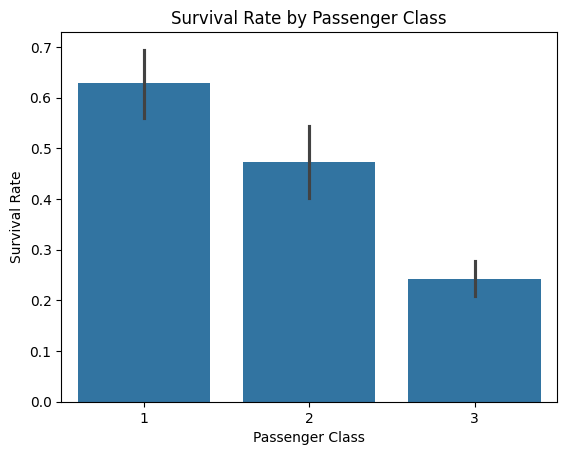

In [44]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

## Correlation Analysis
Passenger class and fare show moderate correlation with survival.

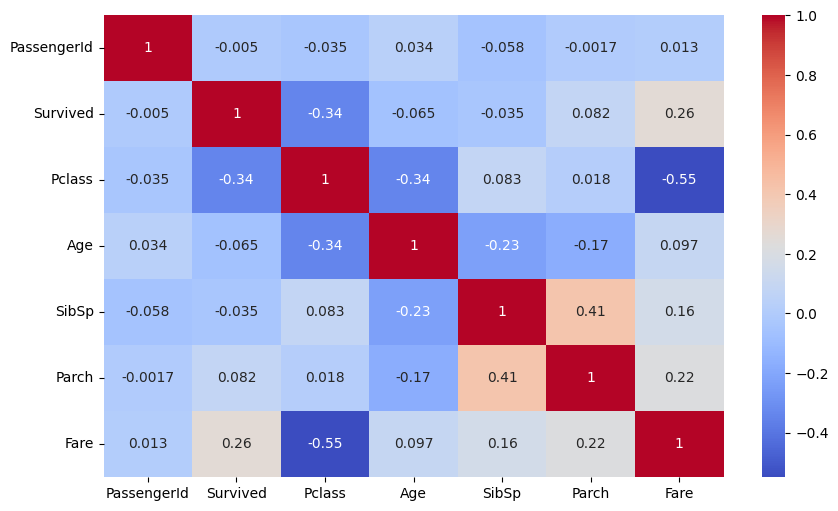

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


## Conclusion


. There is a moderate negative correlation (-0.34) between Pclass and Survived, meaning higher class passengers (1st class) had better survival chances.

.Fare has a positive correlation (0.26) with survival, indicating passengers who paid higher fares were more likely to survive.

.Age shows very weak correlation with survival, suggesting age was not a strong factor.
SibSp and Parch show minimal influence on survival.

The exploratory data analysis of the Titanic dataset reveals that gender and passenger class were the strongest factors influencing survival. Female passengers had significantly higher survival rates compared to males. Additionally, first-class passengers had better survival chances compared to second and third class passengers.
Fare price showed a moderate positive relationship with survival, suggesting socio-economic status played an important role. Age and family-related variables had minimal impact on survival probability.
Overall, the analysis indicates that social and economic factors significantly influenced survival outcomes during the Titanic disaster.

Covered topics 
EDA and Data Visualization